# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [10]:
main_label = 'PS_Transfer_Operational'
sc = 'noSC'
legend_label = r'$\frac{\delta p}{p_0}$'
save_folder = 'Plots/Operational/Simple_100um/'

## Load bunch data

In [11]:
load_bunch_data = False

In [12]:
if load_bunch_data:
    # We have 7 simulations per scan 
    dd = dict()

    maxi = 30
    turns = range(0, maxi)
    print turns

    folders = []
    folders.append('01_01')
    folders.append('01_02')
    folders.append('01_03')
    folders.append('01_04')
    folders.append('01_05')
    folders.append('01_06')
    folders.append('01_07')

    for fol in folders:
        dd_temp = dict()
        for t in turns:
            if t <= 9:    inputs = str(fol + '/bunch_output/mainbunch_00000' + str(int(t)) + '.mat')
            else:    inputs = str(fol + '/bunch_output/mainbunch_0000' + str(int(t)) + '.mat')
            #print inputs
            dd_temp = add_input_file(dd_temp, inputs, t+1)
        dd_temp = add_input_file(dd_temp, str(fol + '/bunch_output/mainbunch_-000001.mat'), 0)
        dd[int(fol[3:5])] = dd_temp


In [13]:
sorted(dd.keys())

NameError: name 'dd' is not defined

In [ ]:
# access all particle x co-ordinates like this
dd[1][0]['particles']['dE'][0][0][0]

# Load output data

In [14]:
ddo = dict()
ddo = add_input_file(ddo, '01_01/output/output.mat', -3E-3)
ddo = add_input_file(ddo, '01_02/output/output.mat', -2E-3)
ddo = add_input_file(ddo, '01_03/output/output.mat', -1E-3)
ddo = add_input_file(ddo, '01_04/output/output.mat', 0)
ddo = add_input_file(ddo, '01_05/output/output.mat', 1E-3)
ddo = add_input_file(ddo, '01_06/output/output.mat', 2E-3)
ddo = add_input_file(ddo, '01_07/output/output.mat', 3E-3)

	Added output data from  01_01/output/output.mat 	 dictionary key:  -0.003
	Added output data from  01_02/output/output.mat 	 dictionary key:  -0.002
	Added output data from  01_03/output/output.mat 	 dictionary key:  -0.001
	Added output data from  01_04/output/output.mat 	 dictionary key:  0
	Added output data from  01_05/output/output.mat 	 dictionary key:  0.001
	Added output data from  01_06/output/output.mat 	 dictionary key:  0.002
	Added output data from  01_07/output/output.mat 	 dictionary key:  0.003


In [15]:
main_label = 'Operational_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [16]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

(-1, 30)

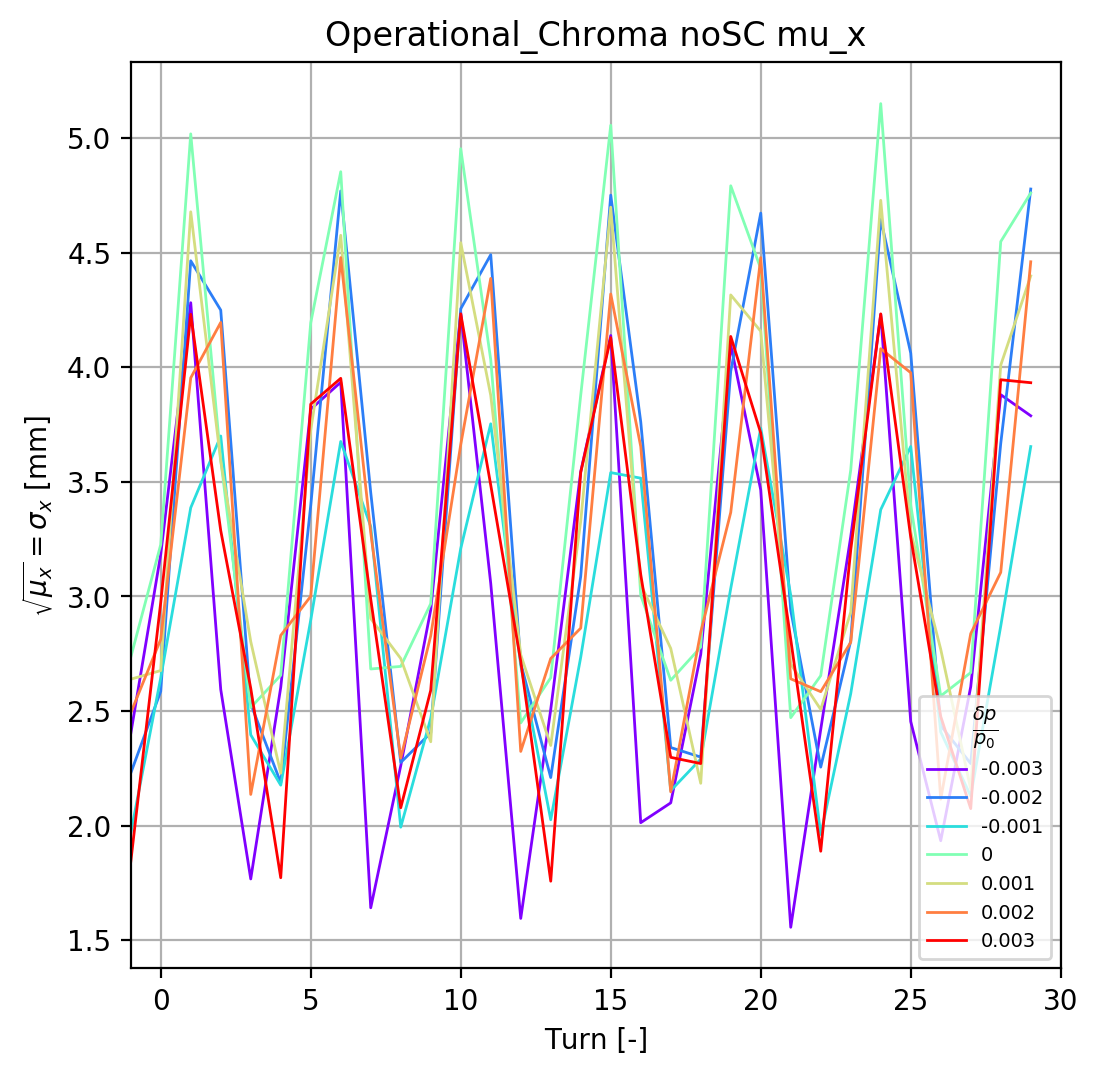

In [17]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

#savename = 'Plots/Param_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

# Save frequencies using different methods

In [34]:
qx_harmonic = []
qy_harmonic = []

qx_fft = []
qy_fft = []

qx_naff = []
qy_naff = []

IndexError: index 7 is out of bounds for axis 0 with size 7

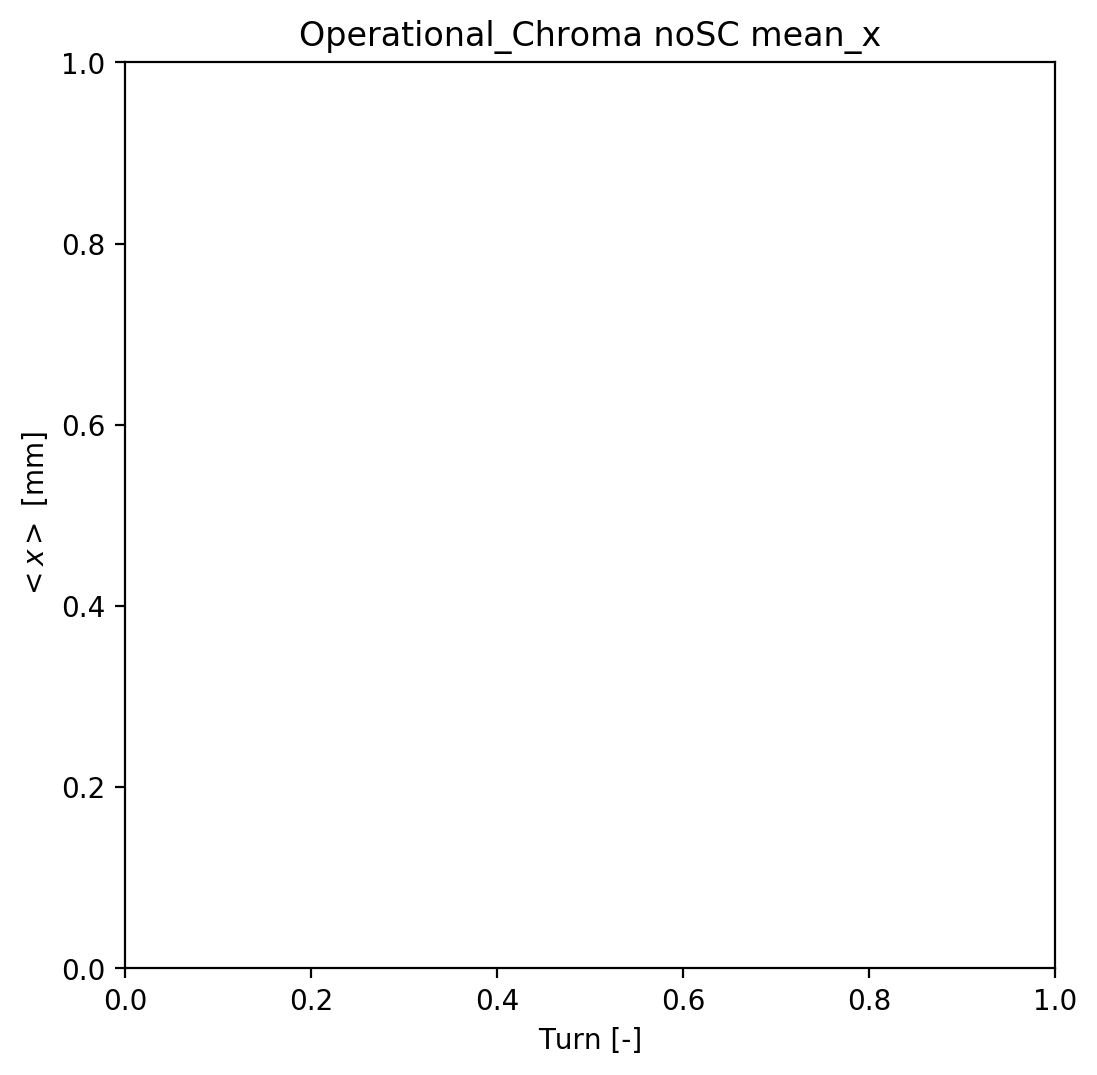

In [19]:
#def harmonic_fn(x, a, b, c, d):
#    return a + b*np.cos(c + 2*np.pi*d*x)

parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

a = 0.02
b = 1.337E-3
c = 0
d = 0.22
y_fine = np.array(range(0, 30000))*0.001

ax1.plot(y_fine, harmonic_fn(y_fine, a, b, c, d), color=colors[c_it], label = 'OP')

ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)


 Momentum Offset =  -0.003
 Offset =  -0.864188300302772  mm
 Amplitude =  1.098598548938703  mm
 Frequency =  0.2177
 Phase offset =  -0.02452411456824164

 Momentum Offset =  -0.002
 Offset =  -0.7513266737341847  mm
 Amplitude =  0.341251040047182  mm
 Frequency =  0.2135
 Phase offset =  0.08162642854288392

 Momentum Offset =  -0.001
 Offset =  -0.7004737574539867  mm
 Amplitude =  0.9196893833475029  mm
 Frequency =  0.2178
 Phase offset =  -0.17121169531903432

 Momentum Offset =  0
 Offset =  -0.45178226738835453  mm
 Amplitude =  0.6959326443259107  mm
 Frequency =  0.2202
 Phase offset =  0.5834234966216852

 Momentum Offset =  0.001
 Offset =  -0.2501124304294679  mm
 Amplitude =  1.026908996467044  mm
 Frequency =  0.2197
 Phase offset =  0.4811415542057975

 Momentum Offset =  0.002
 Offset =  -1.0610576931290392  mm
 Amplitude =  0.6584633511901604  mm
 Frequency =  0.2171
 Phase offset =  0.022761894458335853

 Momentum Offset =  0.003
 Offset =  -0.5725779104506475  mm

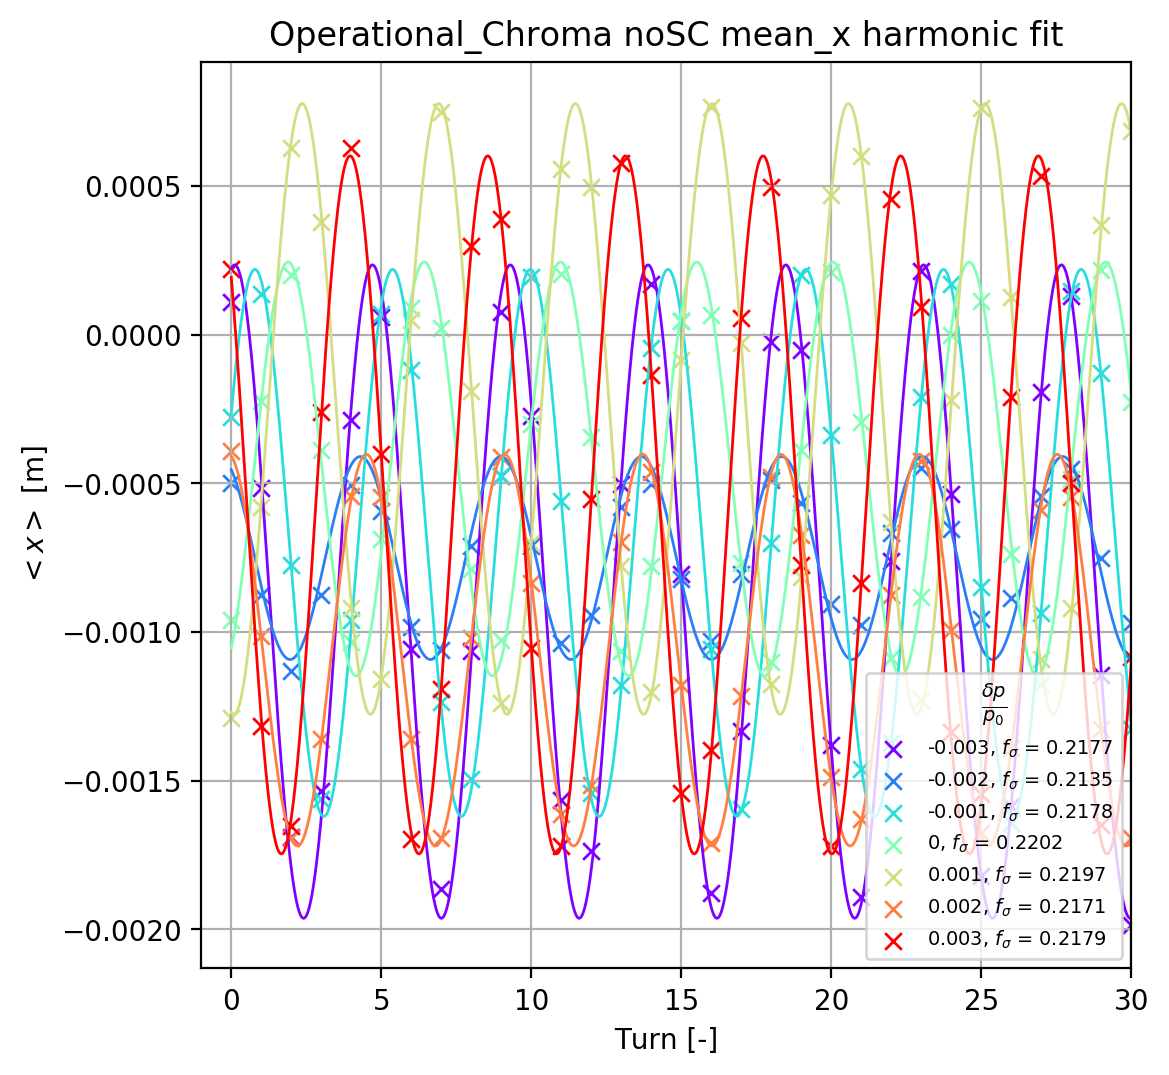

In [35]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit'
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))

    mean_y = np.mean(ddo[key][parameter][0])
    if mean_y < 0.0 :
        offset_min = 1.1 * np.mean(ddo[key][parameter][0])
        offset_max = 0.9 * np.mean(ddo[key][parameter][0])
    else:
        offset_min = 0.9 * np.mean(ddo[key][parameter][0])
        offset_max = 1.1 * np.mean(ddo[key][parameter][0])    

    amp_min = 0.5 * 0.999 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))
    amp_max = 0.5 * 1.001 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))

    freq_min = 0.15
    freq_max = 0.3

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, ddo[key][parameter][0], method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0] * 1E3, ' mm'
    print ' Amplitude = ', popt[1] * 1E3, ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, ddo[key][parameter][0], label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qx_harmonic.append(popt[3])
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_harmonic.png'
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.003
 Offset =  0.038465655056417615  mm
 Amplitude =  0.9556742452879916  mm
 Frequency =  0.2429
 Phase offset =  -0.09091725712673267

 Momentum Offset =  -0.002
 Offset =  0.003313229757271693  mm
 Amplitude =  1.2153511087674254  mm
 Frequency =  0.2431
 Phase offset =  0.09347712629518103

 Momentum Offset =  -0.001
 Offset =  0.03733846426079353  mm
 Amplitude =  1.4258542965114096  mm
 Frequency =  0.2419
 Phase offset =  0.013200945481935384

 Momentum Offset =  0
 Offset =  -0.013758823503818915  mm
 Amplitude =  0.3546020932284769  mm
 Frequency =  0.1956
 Phase offset =  0.5099241253839588

 Momentum Offset =  0.001
 Offset =  -0.0014564619678981152  mm
 Amplitude =  0.14414693794345462  mm
 Frequency =  0.2297
 Phase offset =  -0.3017915622923622

 Momentum Offset =  0.002
 Offset =  -0.01285614499327596  mm
 Amplitude =  1.2799814826558573  mm
 Frequency =  0.2435
 Phase offset =  -0.4403055600083386

 Momentum Offset =  0.003
 Offset =  0.000316237

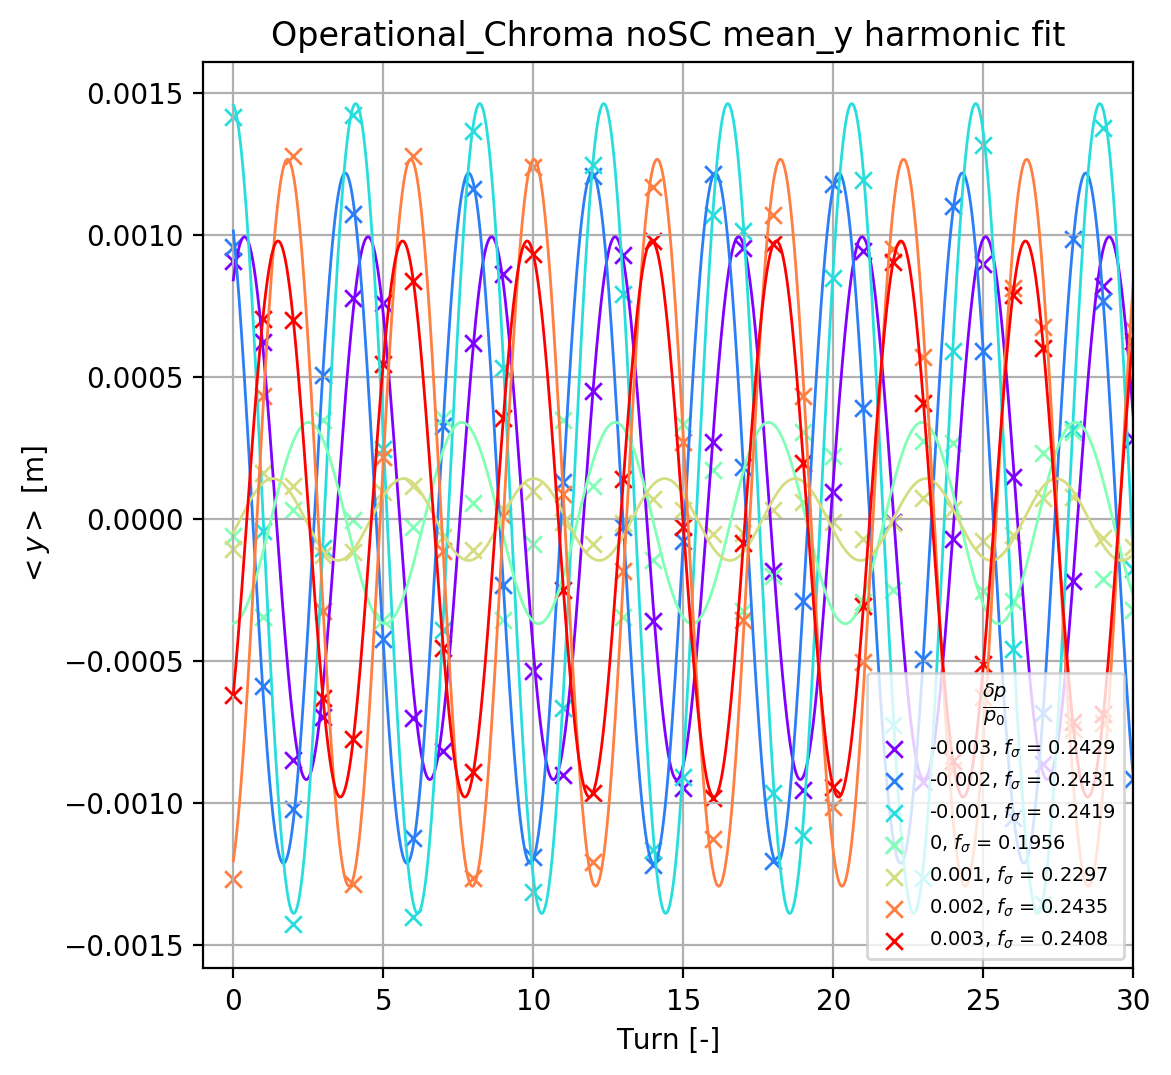

In [36]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit'
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))

    mean_y = np.mean(ddo[key][parameter][0])
    if mean_y < 0.0 :
        offset_min = 1.1 * np.mean(ddo[key][parameter][0])
        offset_max = 0.9 * np.mean(ddo[key][parameter][0])
    else:
        offset_min = 0.9 * np.mean(ddo[key][parameter][0])
        offset_max = 1.1 * np.mean(ddo[key][parameter][0])    

    amp_min = 0.5 * 0.999 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))
    amp_max = 0.5 * 1.001 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))

    freq_min = 0.15
    freq_max = 0.3

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, ddo[key][parameter][0], method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0] * 1E3, ' mm'
    print ' Amplitude = ', popt[1] * 1E3, ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, ddo[key][parameter][0], label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_harmonic.png'
plt.savefig(savename, dpi = 800);

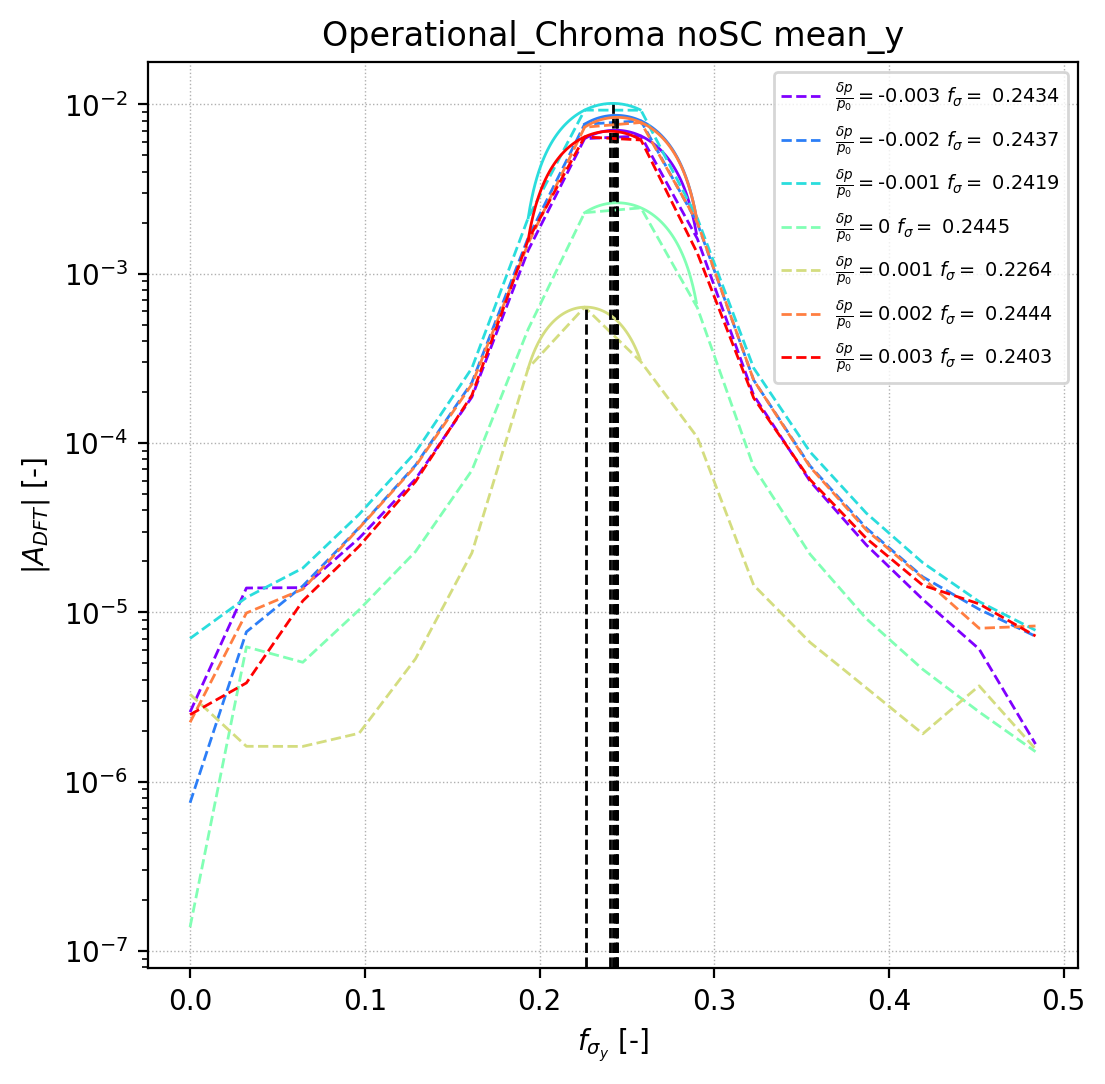

In [37]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' mean_y'
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    qy_fft.append(f_max)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'y_fft.png'
plt.savefig(savename, dpi = 800);

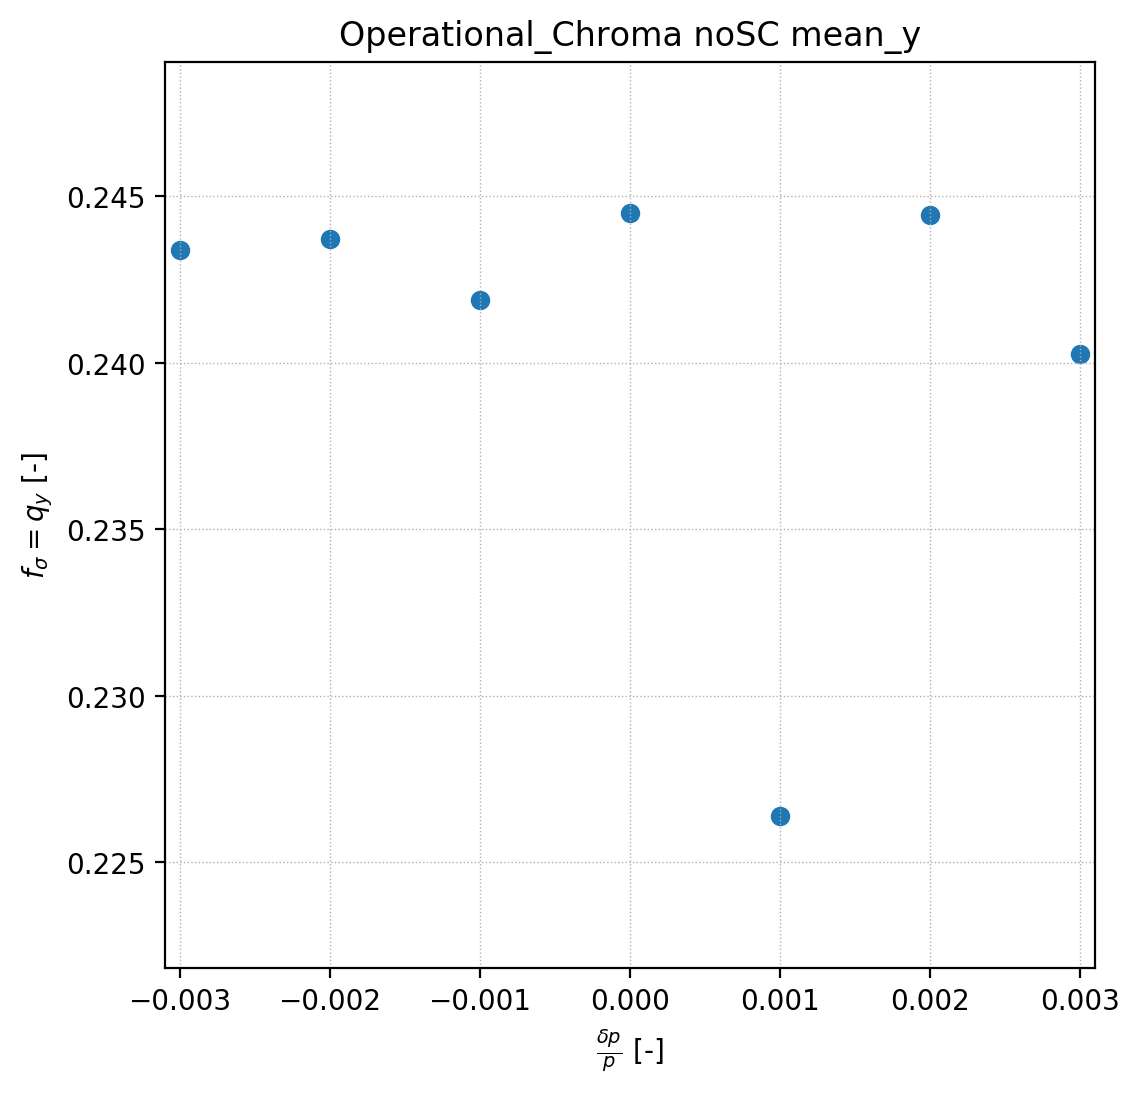

In [38]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' mean_y'
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = save_folder + 'qy.png'
plt.savefig(savename, dpi = 800);

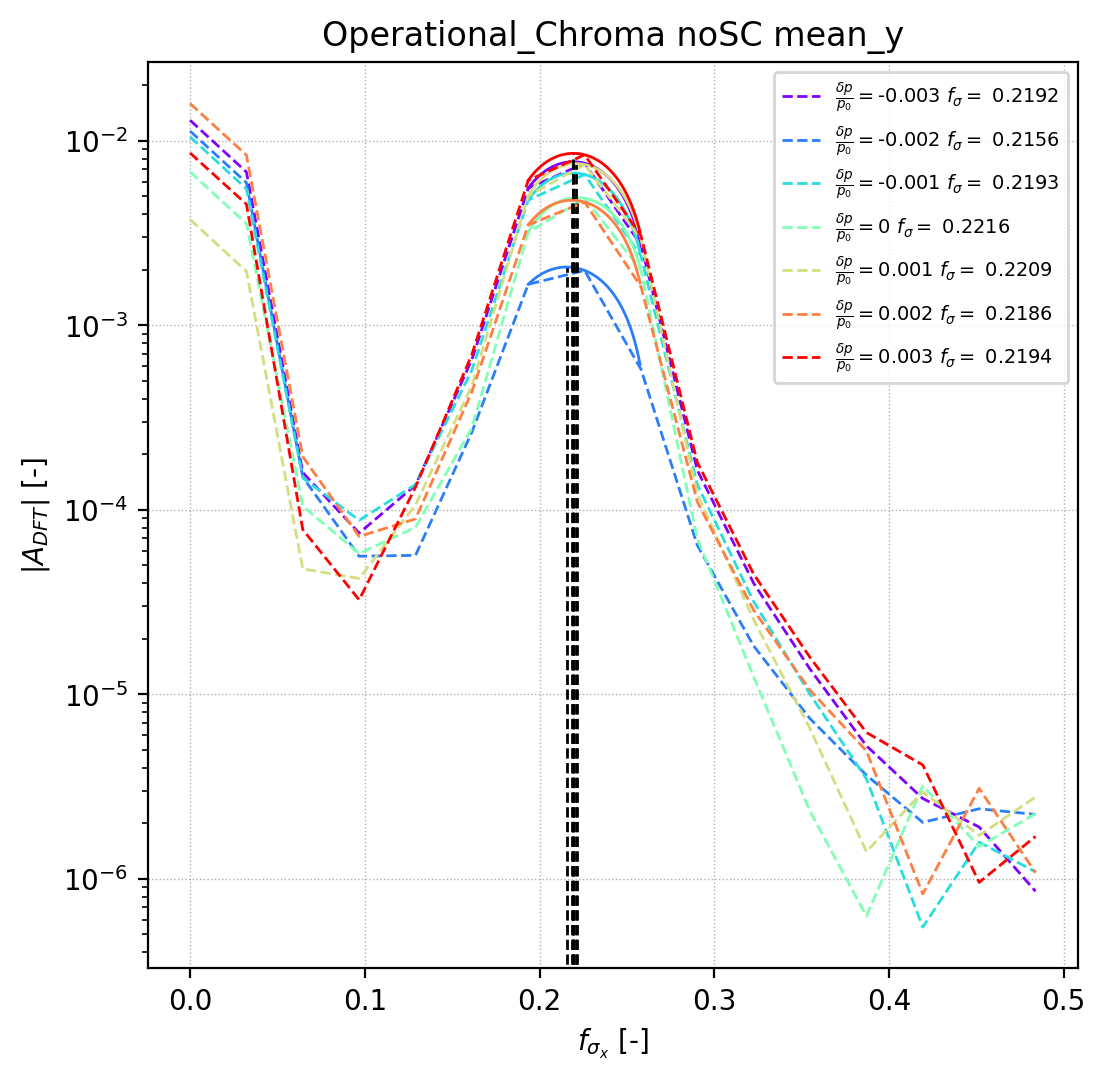

In [39]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    qx_fft.append(f_max)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'x_fft.png'
plt.savefig(savename, dpi = 800);

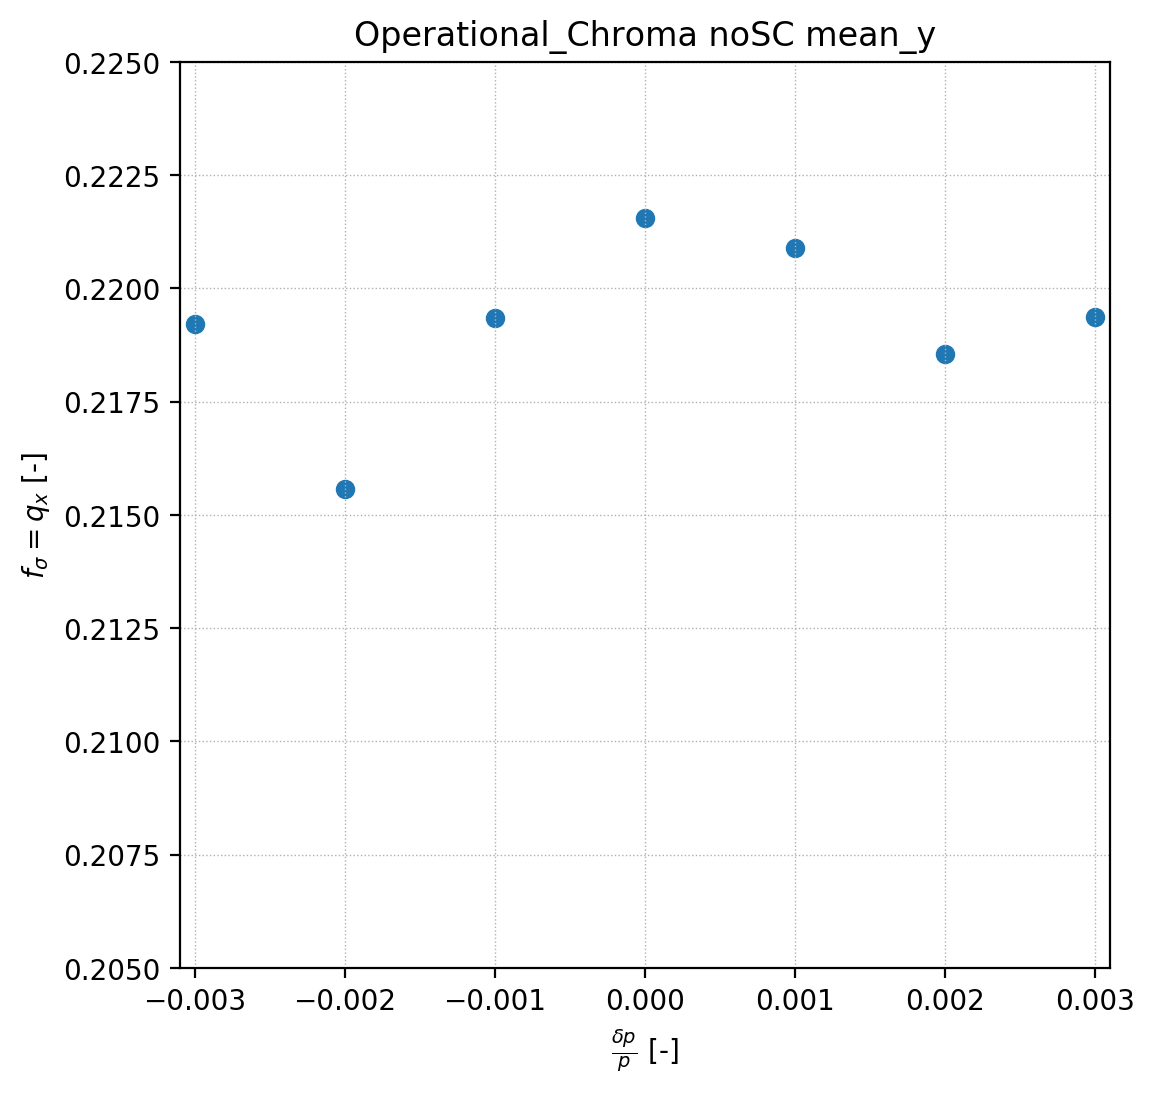

In [40]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' ' + parameter;
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];
ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = save_folder + 'qx.png'
plt.savefig(savename, dpi = 800);

# Calculate tunes using NAFF

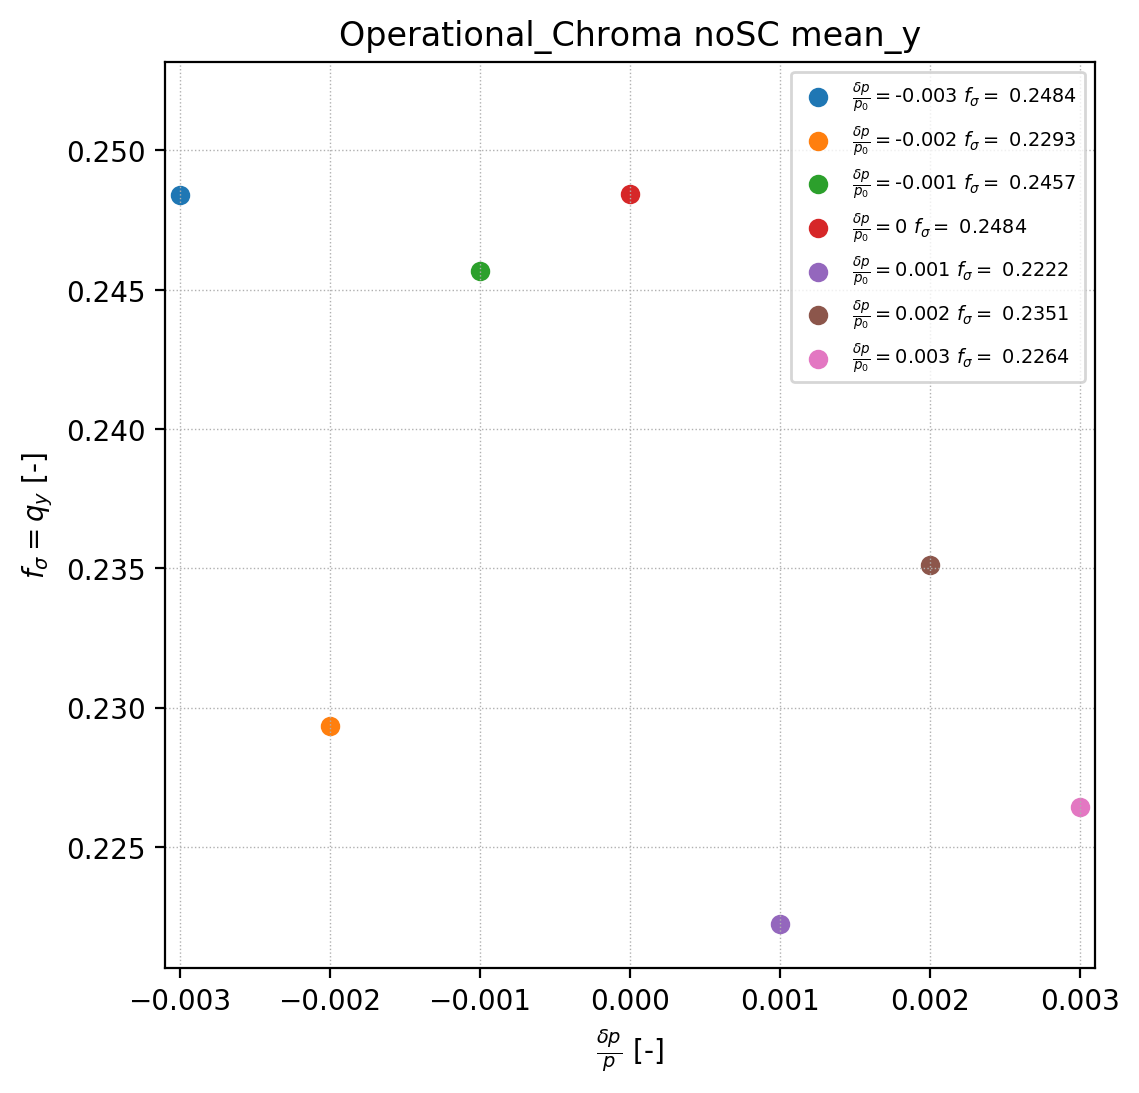

In [41]:
parameter = 'mean_y'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

skiptrns= 0
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 

        
    f_sig_x.append(freq)
    qy_naff.append(freq)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_naff.png'
plt.savefig(savename, dpi = 800);

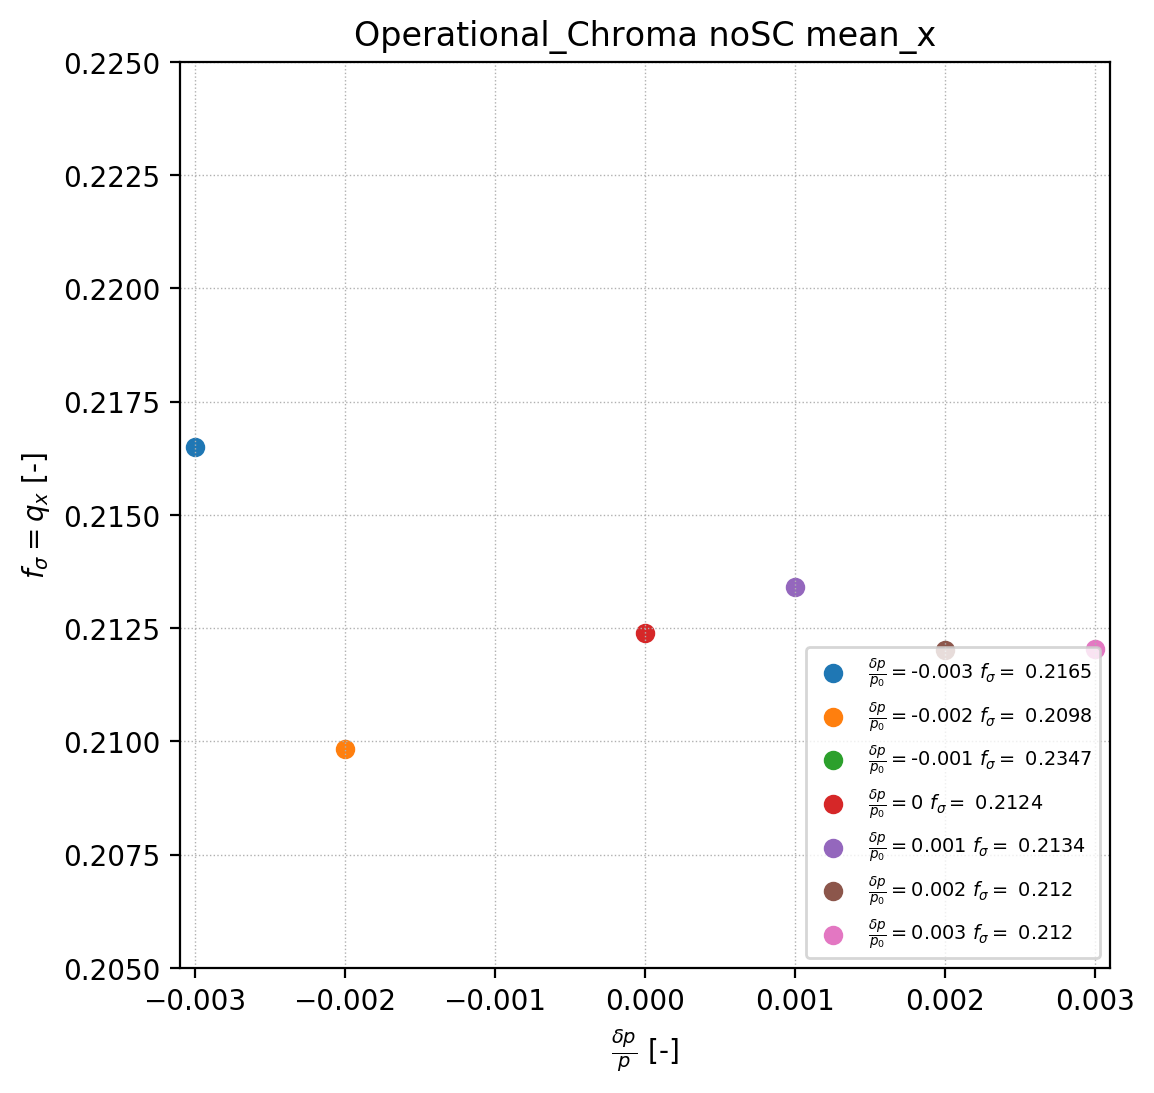

In [42]:
parameter = 'mean_x'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

skiptrns= 6
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 
        
    f_sig_x.append(freq)
    qx_naff.append(freq)
    
ax1.legend(fontsize='x-small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_naff.png'
plt.savefig(savename, dpi = 800);

# Compare different calculated tunes

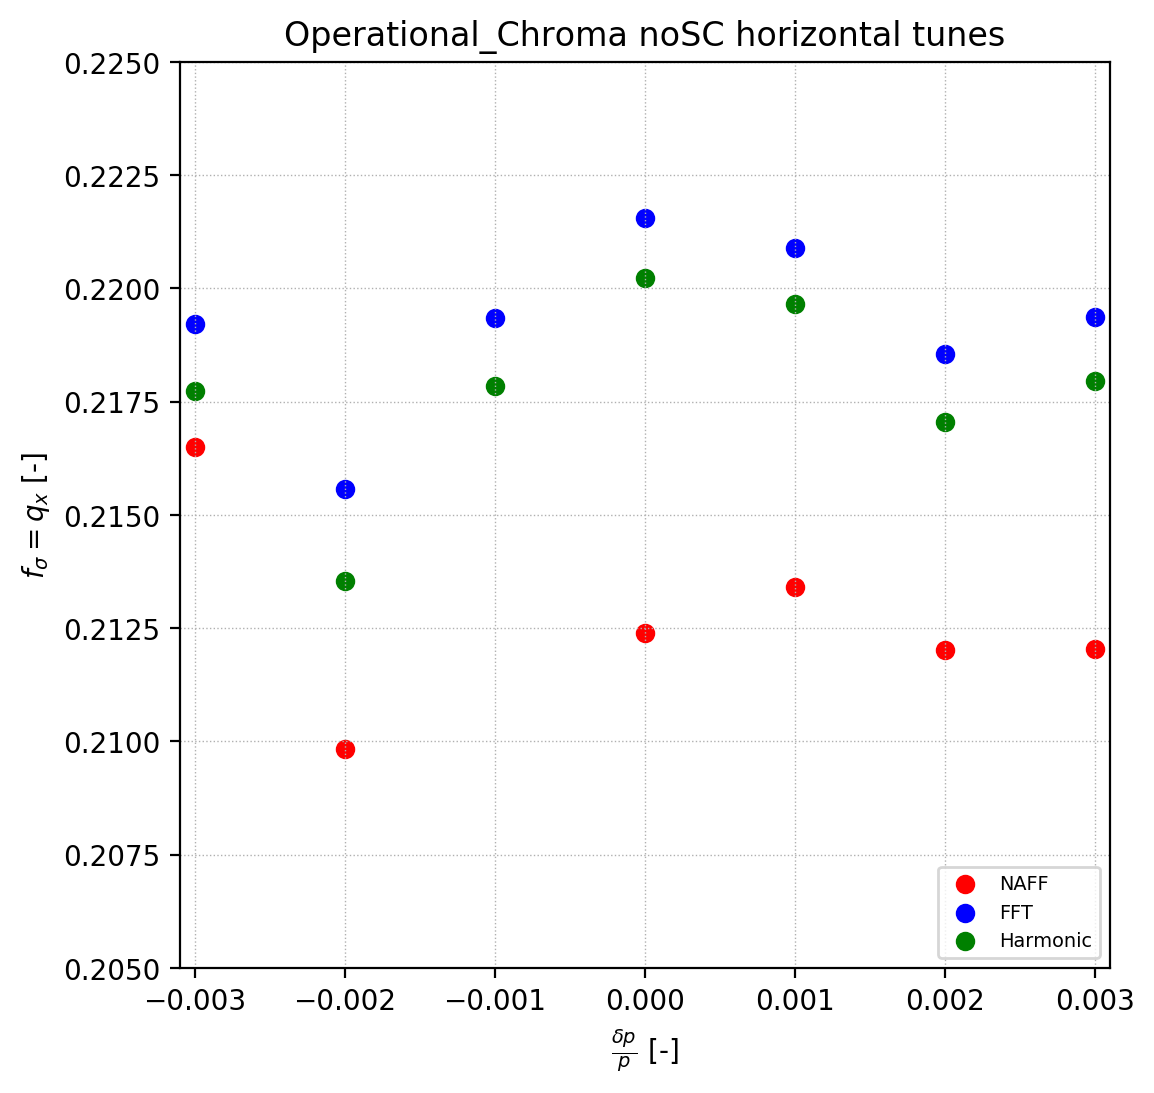

In [43]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' horizontal tunes'
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, qx_naff, label='NAFF', color='r');
ax1.scatter(dps, qx_fft, label='FFT', color='b');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g');

ax1.legend(fontsize='x-small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.savefig(savename, dpi = 800);

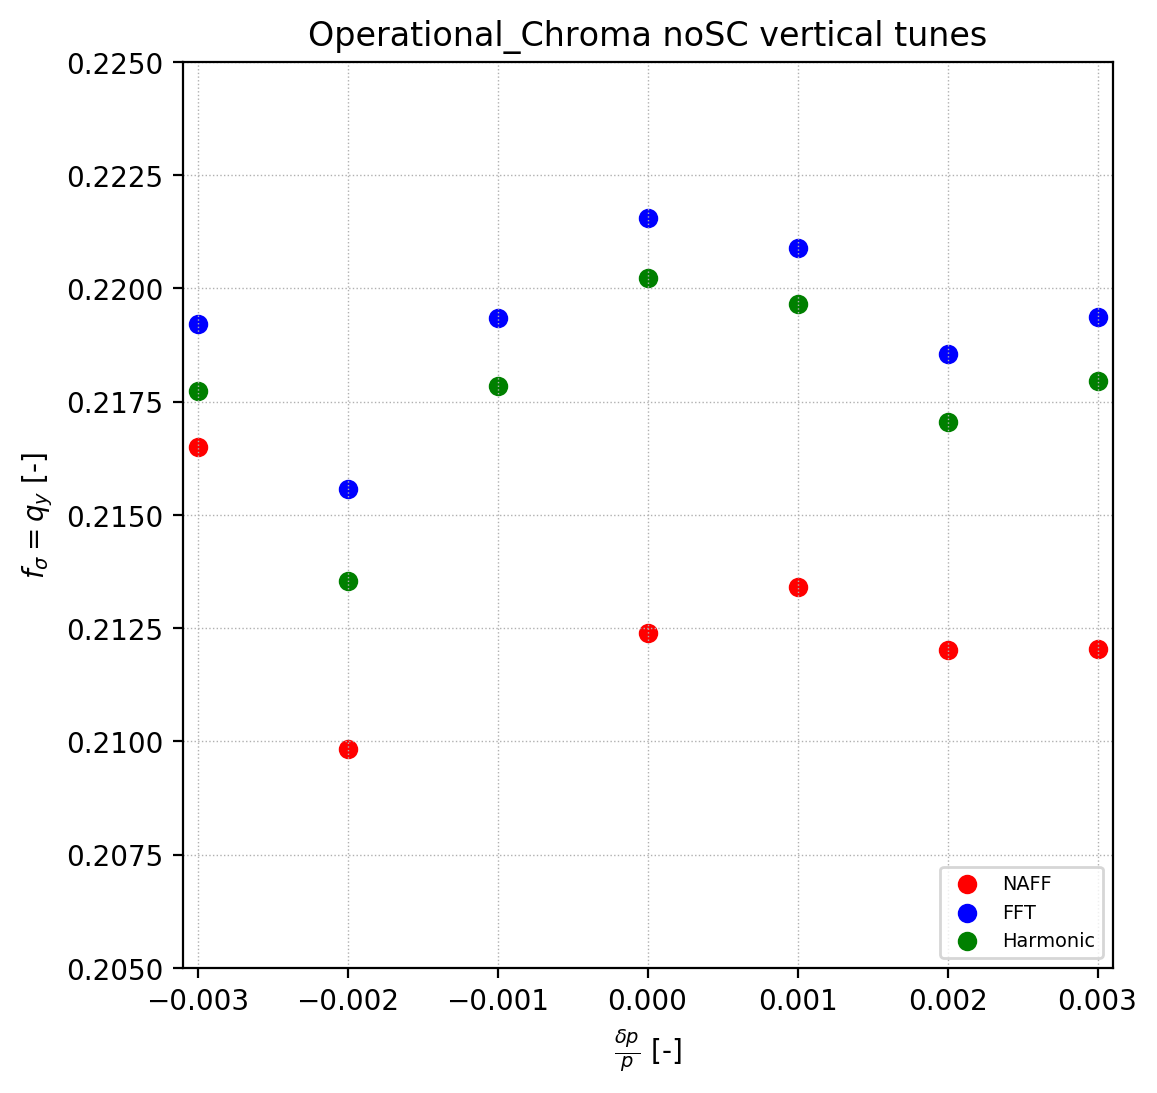

In [44]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' vertical tunes'
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, qx_naff, label='NAFF', color='r');
ax1.scatter(dps, qx_fft, label='FFT', color='b');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g');

ax1.legend(fontsize='x-small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_cf.png'
plt.savefig(savename, dpi = 800);